### Imroved Code Of PC Parts Classifier

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


data_dir = 'pc_parts' # Location of your dataset 


categories = sorted(os.listdir(data_dir)) # all the images having category , it is stored in this variable.
# and also sort the categories in alphabetical order 

img_size = (150, 150) # target size of input image during training and validation 
batch_size = 32  # it set the number of samples proceed in each iteration during training.

# Create an image data generator 
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)
# set the pixel of each images in between 0 and 1 , 20% data goes for validation 
# Generate training data
train_generator = datagen.flow_from_directory(data_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', subset='training')
#flow_from_directory generates batches of augmented data from the specified directory (data_dir). It sets the target size, batch size, class mode (categorical for multiple classes), and subset for training.
# Generate validation data
validation_generator = datagen.flow_from_directory(data_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', subset='validation')

# This code build the neural network 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) # Convolutional layer with 32 filters/kernels, each of size (3, 3). Activation function is ReLU.
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(categories), activation='softmax'))

# compiling the model and setting up optimizer and the loss function which helps us to calculate the loss.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Catgorical_crossentropy is Multi class classification problem 
# training the model and we set the number of iteration 50 so the inner loop execute for the 50 times. 
history = model.fit(train_generator, epochs=50, validation_data=validation_generator)

# saving the model in the same directory and it save in the hierarchical file format because it has large amount of data.
model.save('pc_parts_classifier.h5')



Found 2629 images belonging to 14 classes.
Found 650 images belonging to 14 classes.



Epoch 1/50


83/83 [==============================] - 168s 2s/step - loss: 2.6486 - accuracy: 0.1046 - val_loss: 2.5612 - val_accuracy: 0.1662
Epoch 2/50
83/83 [==============================] - 159s 2s/step - loss: 2.4876 - accuracy: 0.1681 - val_loss: 2.3853 - val_accuracy: 0.2231
Epoch 3/50
83/83 [==============================] - 158s 2s/step - loss: 2.3157 - accuracy: 0.2545 - val_loss: 2.1853 - val_accuracy: 0.2908
Epoch 4/50
83/83 [==============================] - 164s 2s/step - loss: 2.1420 - accuracy: 0.3035 - val_loss: 2.1651 - val_accuracy: 0.3200
Epoch 5/50
83/83 [==============================] - 159s 2s/step - loss: 2.0244 - accuracy: 0.3450 - val_loss: 2.0896 - val_accuracy: 0.3323
Epoch 6/50
83/83 [==============================] - 161s 2s/step - loss: 1.9096 - accuracy: 0.3773 - val_loss: 2.0313 - val_accuracy: 0.3446
Epoch 7/50
83/83 [==============================] - 162s 2s/ste

Epoch 48/50
83/83 [==============================] - 163s 2s/step - loss: 0.3729 - accuracy: 0.8886 - val_loss: 2.6764 - val_accuracy: 0.4662
Epoch 49/50
83/83 [==============================] - 164s 2s/step - loss: 0.3956 - accuracy: 0.8771 - val_loss: 2.7569 - val_accuracy: 0.4600
Epoch 50/50
83/83 [==============================] - 164s 2s/step - loss: 0.3428 - accuracy: 0.8924 - val_loss: 2.8571 - val_accuracy: 0.4554


C:\Users\LENOVO-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# From above program we save our model in .h5 file i.e. hierarchical file.
model = load_model('pc_parts_classifier.h5')

# Setting up the path of the testing data set directory 
test_data_dir = 'pc_parts'

# Get the list of categories from subfolders
categories = sorted(os.listdir(test_data_dir))

# Setting up the image size
img_size = (150, 150)

# this function is used to load and preprocess an image for prediction
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array / 255.0  # Normalize the pixel values i.e. convering it into 0's and 1's.

# This function is to predict the category of an image
def predict_image_category(image_path):
    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)
    category_index = np.argmax(prediction)
    return categories[category_index]


correct_predictions = 0
total_predictions = 0

for category in categories:
    category_path = os.path.join(test_data_dir, category)
    for img_file in os.listdir(category_path):
        img_path = os.path.join(category_path, img_file)
        predicted_category = predict_image_category(img_path)
        total_predictions += 1
        if predicted_category == category:
            correct_predictions += 1

accuracy = correct_predictions / total_predictions
print(f"Accuracy on the test dataset: {accuracy * 100:.2f}%")


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 51ms/step
Accuracy on the test dataset: 86.61%


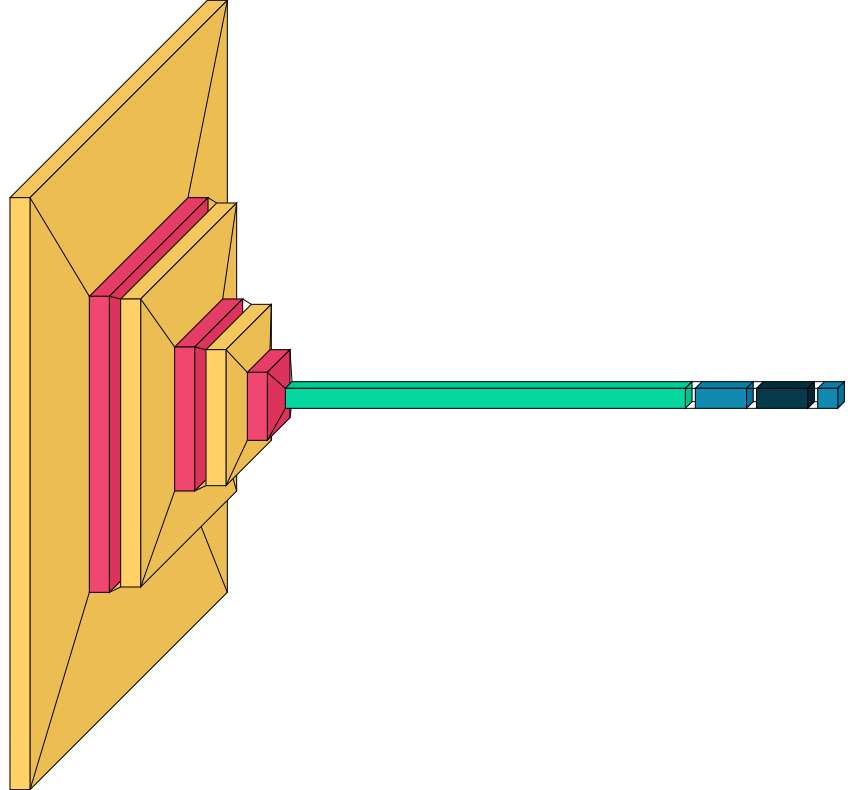

In [26]:
import visualkeras
visualkeras.layered_view(model)
